# Fourier Transform

In [78]:
import numpy as np
import imageio 
import matplotlib.pyplot as plt

### Part A - Representations of functions

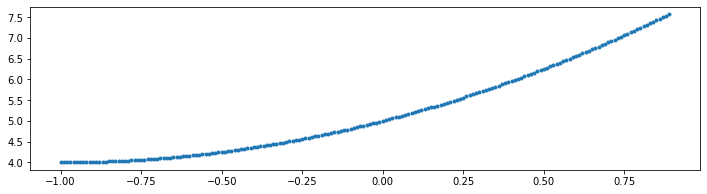

In [79]:
x = np.arange(-1, 0.9, 0.01) # points in x in which the function will be evaluated
f = 5 + 2 * x + 1 * x**2 

plt.figure(figsize=(12, 3))
plt.plot(x, f, '.')

In [80]:
# sample points from f
sx = np.zeros(round(len(x)/20.0))
sf = np.zeros(round(len(x)/20.0))
print(sx)
print(sf)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


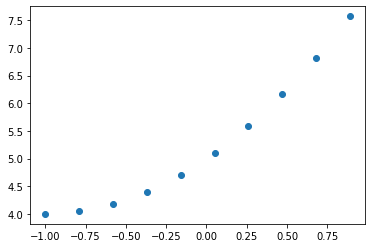

In [81]:
j = 0
for i in range(0, len(x) + 1, 21):
    sx[j] = x[i] # samples from x 
    sf[j] = f[i] # samples from f
    j += 1

plt.plot(sx, sf, 'o')
plt.show()

In [82]:
# building the linear system
N = 2 # polynomial degree

Y = sf
A = np.zeros([len(Y), N + 1])

A[:, 0] = sx**N # column 1 - coefficient N (2)
A[:, 1] = sx**(N - 1) # column 2 - coefficient N-1 (1)
A[:, 2] = 1 # column 3 - coefficient N-2 (0)

print(A)
print(Y)

[[ 1.     -1.      1.    ]
 [ 0.6241 -0.79    1.    ]
 [ 0.3364 -0.58    1.    ]
 [ 0.1369 -0.37    1.    ]
 [ 0.0256 -0.16    1.    ]
 [ 0.0025  0.05    1.    ]
 [ 0.0676  0.26    1.    ]
 [ 0.2209  0.47    1.    ]
 [ 0.4624  0.68    1.    ]
 [ 0.7921  0.89    1.    ]]
[4.     4.0441 4.1764 4.3969 4.7056 5.1025 5.5876 6.1609 6.8224 7.5721]


In [83]:
# computing the coefficients by solving the linear system
C1 = np.linalg.inv((np.matmul(np.transpose(A), A)))
C2 = np.matmul(np.transpose(A), Y)
C = np.matmul(C1, C2)

print(C)

[1. 2. 5.]


### Part B - Sinusoids and Complex Exponentials

Combining sine and cosine into a complex exponential value, we can represent a sinusoid as a complex exponential function.

Remember we want functions with this property: $f(t) = f(t + nT)$, in whic $T$ is the period of the function and $n$ is an integer.

In [84]:
t = 2
print("%.4f"% (np.sin(t)))
print("%.4f"% (np.cos(t)))

0.9093
-0.4161


In [85]:
T = 2 * np.pi
print("%.4f"% (np.sin(t + T)))
print("%.4f"% (np.cos(t + T)))

0.9093
-0.4161


In [86]:
for i in range(6):
    print("%.4f"% (np.sin(t + i * T)))

for i in range(6):
    print("%.4f"% (np.cos(t + i * T)))

0.9093
0.9093
0.9093
0.9093
0.9093
0.9093
-0.4161
-0.4161
-0.4161
-0.4161
-0.4161
-0.4161


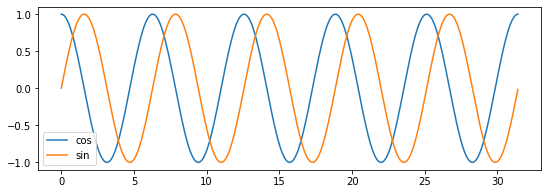

In [87]:
t = np.arange(0, T * 5, 0.1)

fcos = np.cos(t)
fsin = np.sin(t)

plt.figure(figsize=(9, 3))
plt.plot(t, fcos, label='cos')
plt.plot(t, fsin, label='sin')
plt.legend()
plt.show()

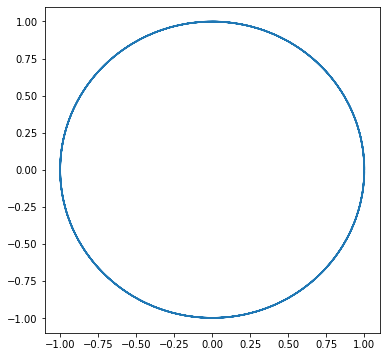

In [88]:
# produce the circle
plt.figure(figsize=(6, 6))
plt.plot(fcos, fsin)

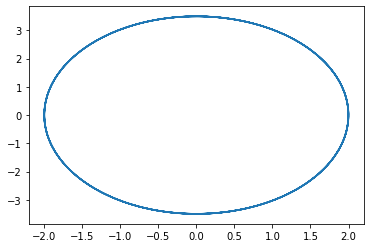

In [89]:
fcos = 2 * np.cos(t)
fsin = 3.5 * np.sin(t)

plt.plot(fcos, fsin)

In [90]:
comp_numb = (3 + 2j)

print(comp_numb)
print(type(comp_numb))
print(comp_numb.real)
print(comp_numb.imag)

(3+2j)
<class 'complex'>
3.0
2.0


In [91]:
exponen_3_5 = np.exp(0 + 3.5j)
print(exponen_3_5)

print('Real part: %.4f'% (exponen_3_5.real))
print('Imaginary part: %.4f'% (exponen_3_5.imag))

print('Cosine: %.4f'% (np.cos(3.5)))
print('Sine: %.4f'% (np.sin(3.5)))

(-0.9364566872907963-0.35078322768961984j)
Real part: -0.9365
Imaginary part: -0.3508
Cosine: -0.9365
Sine: -0.3508


### Part C - Introduction to Frequency Analysis

We are going to introduce how to analyse signals $f(x)$ and images $f(x, y)$ in the frequency domain.

Repeated patterns in the signal are represented by the frequency of the signal. The frequency of a signal is the number of cycles that the signal completes in a unit of time.

Simple mathematical functions can be represented by a sum of sinusoids. This is the basis of the Fourier Transform. 

- low frequencies present slow or smooth variation
- high frequencies present fast oscillations

In [92]:
t = np.arange(0, 1, 0.001)
print('Number of observations: %d'% (len(t)))

Number of observations: 1000


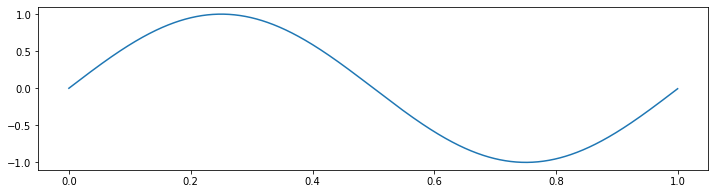

In [93]:
mysine = np.sin(2 * np.pi * t)

plt.figure(figsize=(12, 3))
plt.plot(t, mysine)

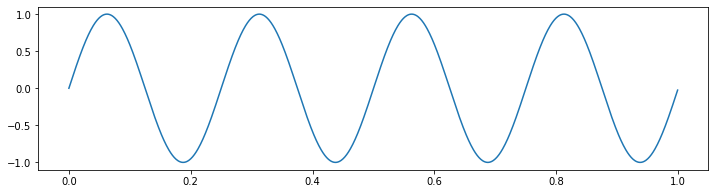

In [94]:
mysine4 = np.sin(4 * 2 * np.pi * t)

plt.figure(figsize=(12, 3))
plt.plot(t, mysine4)

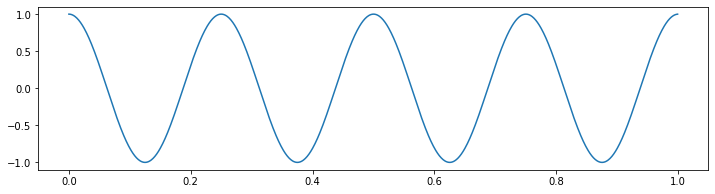

In [95]:
mycos4 = np.cos(4 * 2 * np.pi * t)

plt.figure(figsize=(12, 3))
plt.plot(t, mycos4)

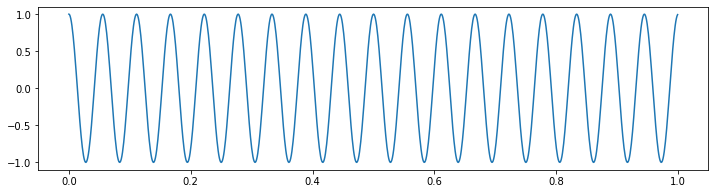

In [96]:
mycos18 = np.cos(18 * 2 * np.pi * t)

plt.figure(figsize=(12, 3))
plt.plot(t, mycos18)

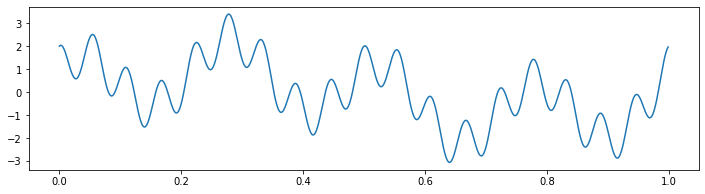

In [97]:
myfun = mysine + mysine4 + mycos4 + mycos18

plt.figure(figsize=(12, 3))
plt.plot(t, myfun)

Now let us match the function with sines and cosines in frequencies 3 Hz (not part of signal) and 4 Hz.

In [98]:
Omega = 4 # freq

match_sin_4 = myfun * np.sin(Omega * (2 * np.pi) * t)
match_cos_4 = myfun * np.cos(Omega * (2 * np.pi) * t)

print('Sum of matching sines at 4Hz: %.4f'% (np.sum(match_sin_4)))
print('Sum of matching cosines at 4Hz: %.4f'% (np.sum(match_cos_4)))

Sum of matching sines at 4Hz: 500.0000
Sum of matching cosines at 4Hz: 500.0000


In [99]:
Omega = 3

match_sin_3 = myfun * np.sin(Omega * (2 * np.pi) * t)
match_cos_3 = myfun * np.cos(Omega * (2 * np.pi) * t)

print('Sum of matching sines at 3Hz: %.4f'% (np.sum(match_sin_3)))
print('Sum of matching cosines at 3Hz: %.4f'% (np.sum(match_cos_3)))

Sum of matching sines at 3Hz: -0.0000
Sum of matching cosines at 3Hz: 0.0000


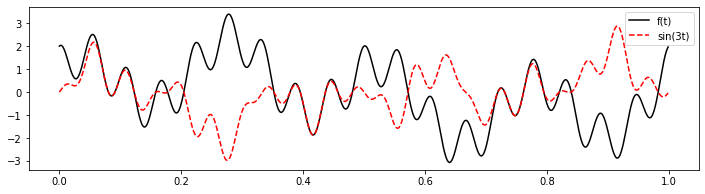

In [100]:
plt.figure(figsize=(12, 3))
plt.plot(t, myfun, '-k', label='f(t)')
plt.plot(t, match_sin_3, '--r', label='sin(3t)')
plt.legend()

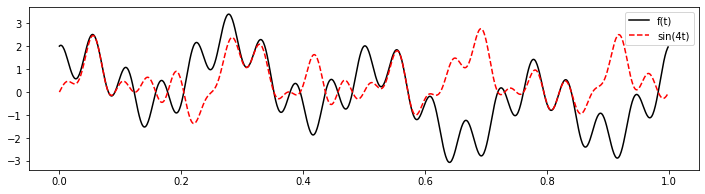

In [101]:
plt.figure(figsize=(12, 3))
plt.plot(t, myfun, '-k', label='f(t)')
plt.plot(t, match_sin_4, '--r', label='sin(4t)')
plt.legend()

In [102]:
def match_freqs(f, t, maxfreq):
    print("Coefficients for sines and cosines:")
    print("Omega\tSin\tCos")

    for Omega in range(0, maxfreq):
        match_sin = np.sum(f * np.sin(Omega * (2 * np.pi) * t))
        match_cos = np.sum(f * np.cos(Omega * (2 * np.pi) * t))
        print("%d\t%.1f\t%.1f"% (Omega, match_sin, match_cos))

In [103]:
match_freqs(myfun, t, 22)

Coefficients for sines and cosines:
Omega	Sin	Cos
0	0.0	-0.0
1	500.0	0.0
2	-0.0	-0.0
3	-0.0	0.0
4	500.0	500.0
5	0.0	-0.0
6	-0.0	-0.0
7	0.0	-0.0
8	0.0	0.0
9	-0.0	-0.0
10	-0.0	-0.0
11	0.0	-0.0
12	0.0	-0.0
13	-0.0	-0.0
14	0.0	-0.0
15	0.0	0.0
16	-0.0	-0.0
17	-0.0	-0.0
18	0.0	500.0
19	-0.0	-0.0
20	-0.0	-0.0
21	0.0	-0.0


### Discrete Fourier Transform (DFT)

The DFT computes, for every frequency $k$, the complex number $X[k]$ that represents the amplitude and phase of the frequency $k$ in the signal.

FOr an input array with #N elements, the DFT is defined as:

$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}$

where $x[n]$ is the input array and $X[k]$ is the output array.

It is often employed using a normalization based on the square root of the number of elements in the input array.

In [104]:
def DFT1D(f):
    '''
    Compute the Discrete Fourier Transform of the 1D input array f
    f: input array
    '''
    F = np.zeros(f.shape, dtype='complex')
    n = f.shape[0]
    
    # for each frequency from u = 0, ..., n - 1
    for u in np.arange(n):
        # for each element of 'f' x = 0, ..., n - 1
        for x in np.arange(n):
            F [u] += f[x] * np.exp((-1j * 2 * np.pi * (u * x)) / n)

    return F/np.sqrt(n)

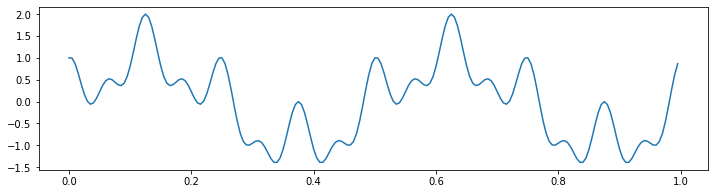

In [105]:
t = np.arange(0, 1, 0.005)
f = 1 * np.sin(t* (2 * np.pi) * 2) + 0.6 * np.cos(t * (2 * np.pi) * 8) + 0.4 * np.cos(t * (2 * np.pi) * 16)

plt.figure(figsize=(12, 3))
plt.plot(t, f)

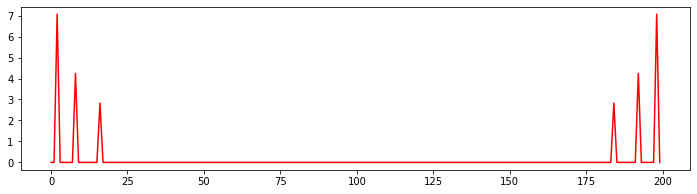

In [106]:
F = DFT1D(f)

fq= np.arange(0, len(F), 1)

plt.figure(figsize=(12, 3))
plt.plot(fq, np.abs(F), 'r')

Due to the symmetric property of the sine and cosine functions (which are similar in shape, but shifted by 90 degrees), the DFT is symmetric. The DFT of a real signal is symmetric around the center of the array.

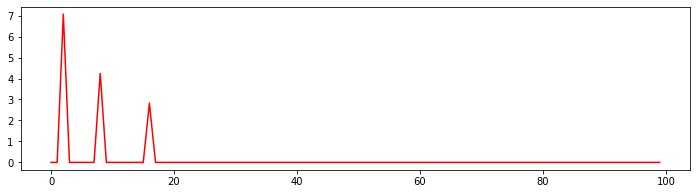

In [107]:
limit = 100 # freq limit to show the DFT of the signal

fq = np.arange(0, limit, 1)
plt.figure(figsize=(12, 3))
plt.plot(fq, np.abs(F[0:limit]), 'r')


The DFT has quadratic complexity, which is not efficient for large arrays. 

In [108]:
import time

def DFT1D(f):
    '''
    Compute the Discrete Fourier Transform of the 1D input array f
    f: input array
    '''
    F = np.zeros(f.shape, dtype='complex')
    n = f.shape[0]
    
    start = time.time()
    x = np.arange(n)

    # for each frequency from u = 0, ..., n - 1
    for u in np.arange(n):
        F [u] = np.sum(f * np.exp((-1j * 2 * np.pi * (u * x)) / n))

    end = time.time()
    
    print('Elapsed time: %.4f'% (end - start))
    print('Number of operations: %d'% (n * n))

    return F/np.sqrt(n)

Elapsed time: 0.0092
Number of operations: 40000


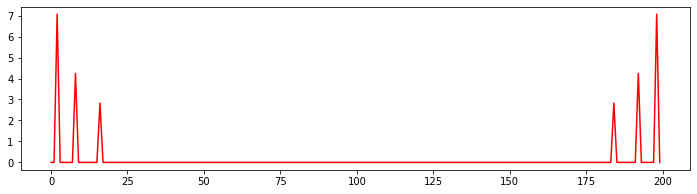

In [109]:
F = DFT1D(f)

fq = np.arange(0, len(F), 1)
plt.figure(figsize=(12, 3))
plt.plot(fq, np.abs(F), 'r')

In [112]:
def inverse_transform1D(F):
    '''
    Inverse Discrete Fourier Transform
    F: input array
    '''
    f = np.zeros(F.shape, dtype='complex')
    n = F.shape[0]
    
    start = time.time()
    u = np.arange(n)

    # for each time from x = 0, ..., n - 1
    for x in np.arange(n):
        f [x] = np.sum(F * np.exp((-1j * 2 * np.pi * (u * x)) / n))

    end = time.time()
    
    print('Elapsed time: %.4f'% (end - start))
    print('Number of operations: %d'% (n * n))

    return f/np.sqrt(n)

Elapsed time: 0.0058
Number of operations: 40000


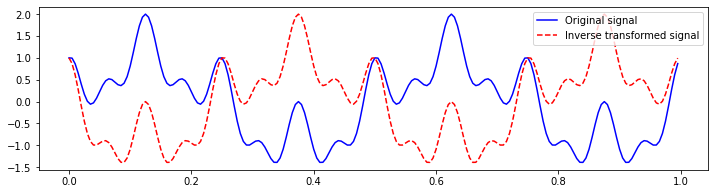

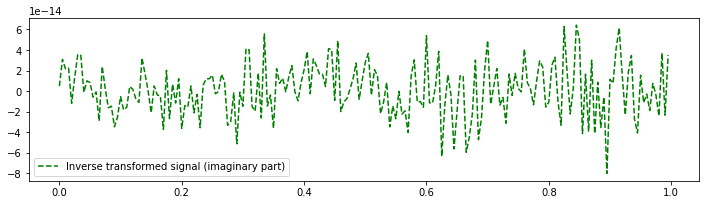

In [113]:
invf = inverse_transform1D(F)

# plot the original signal and the inverse transformed signal
plt.figure(figsize=(12, 3))
plt.plot(t, f, '-b', label='Original signal')
plt.plot(t, invf.real, '--r', label='Inverse transformed signal')
plt.legend()

# plot the imaginary part of the inverse transformed signal
plt.figure(figsize=(12, 3))
plt.plot(t, invf.imag, '--g', label='Inverse transformed signal (imaginary part)')
plt.legend()